In [1]:
import numpy as np #다차원 배열 처리 라이브러리
import pandas as pd #데이터 시각화
import matplotlib.pyplot as plt #matplotlib.pyplot
import seaborn as sns #matplotlib 기반 시각화패키지

%matplotlib inline 
#브라우저에서 바로 확인 (magic command) 윗줄에 같이쓰면 안되는 이유는..?

titanic_df = pd.read_csv("train_titanic.csv") #파일 불러오기 Data Frame?
test = pd.read_csv("test_titanic.csv")
titanic_df.head() #잘 불러왔는지 확인 위한 앞부분 데이터 출력(기본 5행?) 아..드디어.. ㅜㅜ

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("###학습 데이터 정보###")
print(titanic_df.info()) #데이터 정보출력
### null인 데이터 확인

###학습 데이터 정보###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace = True) 
test["Age"].fillna(test["Age"].mean(),inplace = True)
#fillna->결측값채우기, age의 평균값으로 inplace = True ->즉각반영

titanic_df['Cabin'].fillna('N',inplace = True) #N으로 채우기
test["Cabin"].fillna('N',inplace = True)

titanic_df['Embarked'].fillna('N',inplace = True)
test["Embarked"].fillna('N',inplace = True)

print("데이터 세트 NULL값 개수 :",titanic_df.isnull().sum().sum())
#isnull().sum().sum() 데이터 프레임 전체에서 Null값 몇개인지 반환

데이터 세트 NULL값 개수 : 0


In [4]:
print("Sex값 분포:\n"+str(titanic_df["Sex"].value_counts())) #.value_counts()값별로 개수새기
print("\nCabin값 분포:\n"+str(titanic_df["Cabin"].value_counts()))
print("\nEmbarked값 분포\n"+str(titanic_df["Embarked"].value_counts()))

Sex값 분포:
male      577
female    314
Name: Sex, dtype: int64

Cabin값 분포:
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
C82              1
A6               1
D56              1
E50              1
B86              1
Name: Cabin, Length: 148, dtype: int64

Embarked값 분포
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1] #알파벳이 공통부분일 것이라 생각, 알파벳만 남기기
test["Cabin"] = test["Cabin"].str[:1]

print(titanic_df["Cabin"].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

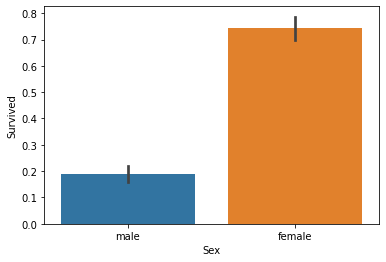

In [6]:
#성별에 따른 생존률
titanic_df.groupby(["Sex","Survived"])["Survived"].count() #.groupby그룹별 집계 -> 생존률 확인
sns.barplot(x = "Sex", y = "Survived", data = titanic_df) #barplot -> 막대그래프

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

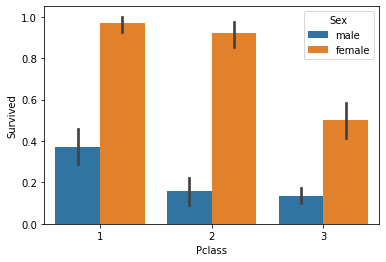

In [7]:
#빈부에 따른 생존률
sns.barplot(x = "Pclass",y = "Survived", hue = "Sex", data = titanic_df) #hue ->세부집단시각화

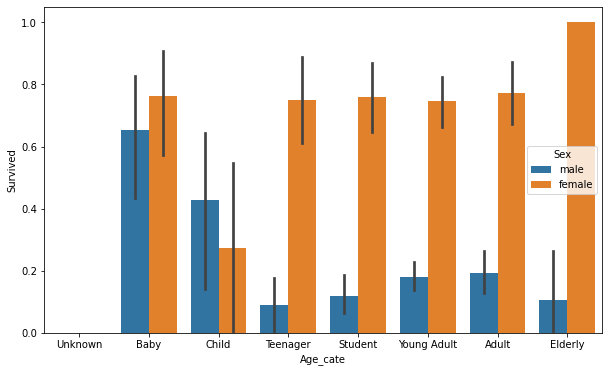

In [8]:
#연령대에 따른 생존률
def get_category(age): #연령대를 나누기 위한 함수
    
    cate = ""
    
    if age <= -1 : cate = "Unknown"
    elif age <= 5 : cate = "Baby"
    elif age <= 12 : cate = "Child"
    elif age <= 18 : cate = "Teenager"
    elif age <= 25 : cate = "Student"
    elif age <= 35 : cate = "Young Adult"
    elif age <= 60 : cate = "Adult"
    else : cate = "Elderly"
    
    return cate 

plt.figure(figsize=(10,6)) #figure 더 크게 설정

group_names = ["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Elderly"] #x축 값 순차적 표시위한 설정

titanic_df["Age_cate"] = titanic_df["Age"].apply(lambda x : get_category(x))
test["Age_cate"] = test["Age"].apply(lambda x : get_category(x))

sns.barplot(x = "Age_cate",y = "Survived", hue = "Sex", data = titanic_df, order = group_names)  
titanic_df.drop("Age_cate",axis = 1, inplace = True)

In [9]:
#object 데이터형 숫자형으로 바꿔주기 -> LabelEncoding
from sklearn import preprocessing #사이킷런 기계학습 라이브러리

def encode_features(dataDF) :
    features = ["Cabin","Sex","Embarked"]
    for feature in features :
        le = preprocessing.LabelEncoder() #LE -> L abel E ncoder
        le = le.fit(dataDF[feature]) #fit -> encoding 하기 위한 set 구하기
        dataDF[feature] = le.transform(dataDF[feature]) #transform -> fit의 호출 결과로 set의 각 element를 고유숫자 값으로 변환
    return dataDF

titanic_df = encode_features(titanic_df)
test = encode_features(test)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [10]:
#NULL 처리 함수
def fillna(df) :
    df["Age"].fillna(df["Age"].mean(), inplace = True)
    df["Cabin"].fillna('N', inplace = True)
    df["Embarked"].fillna('N',inplace = True)
    df["Fare"].fillna(0, inplace = True)
    return df

#불필요한 속성 제거 함수
def drop_features(df) :
    df.drop(["PassengerId","Name","Ticket"], axis = 1, inplace = True)
    return df

#레이블 인코딩 수행 함수
def format_features(df) :
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin","Sex","Embarked"]
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 선언한 전처리 함수들 호출하는 함수
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [11]:
#원본 데이터 재로딩, feature,label 데이터 set 추출
titanic_df = pd.read_csv("train_titanic.csv")
y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived",axis = 1) #axis = 1 열방향 동작

x_titanic_df = transform_features(x_titanic_df)

test = pd.read_csv("test_titanic.csv")
x_rtest = transform_features(test)

In [12]:
from sklearn.model_selection import train_test_split #train data와 test data 분리

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size =0.2, random_state = 11)
#test_size -> 테스트 셋 구성비율 --default는 0.25

In [13]:
from sklearn.tree import DecisionTreeClassifier #분류및 회귀를 위한 패키지/의사결정트리분류모델
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 -> 여러개의 의사결정나무의 다수결로
from sklearn.linear_model import LogisticRegression #data set에 활용할 logistic 모델 생성?
from sklearn.metrics import accuracy_score #훈련데이터 정확도 측정

#결정트리, 랜덤포레스트, logistic regression을 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11) #random_state 난수 seed 설정 /D ecision T ree CL assi F ier
rf_clf = RandomForestClassifier(random_state = 11) #R andom F orest
lr_clf = LogisticRegression() #L ogistic R egression max_iter = 500

#결정트리 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test) #PRED ict
print("DecisionTreeClassifier 정확도 : {0:f}".format(accuracy_score(y_test,dt_pred)))

#랜덤포레스트 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test) 
print("RandomForestClassifier 정확도 : {0:f}".format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print("LogisticRegression 정확도 : {0:f}".format(accuracy_score(y_test,lr_pred))) #max_iter을 늘려줘야 하나->9행에 200으로 늘림

DecisionTreeClassifier 정확도 : 0.787709
RandomForestClassifier 정확도 : 0.854749
LogisticRegression 정확도 : 0.849162


/Users/sujeongoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.model_selection import KFold #KFold 교차검증 

def exec_kfold(clf, folds = 5): 
    #폴드 세트 5개인 KFold 객체 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    #KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        #classifier 학습/예측/정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증{0} 정확도 : {1:f}".format(iter_count,accuracy))
    
    #5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 : {:f}".format(mean_score))
    
#exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증0 정확도 : 0.754190
교차 검증1 정확도 : 0.780899
교차 검증2 정확도 : 0.786517
교차 검증3 정확도 : 0.769663
교차 검증4 정확도 : 0.820225
평균 정확도 : 0.782299


In [15]:
from sklearn.model_selection import cross_val_score #cross_val_score 교차검증 KFold 보다 상대적으로 간단

scores = cross_val_score(dt_clf,x_titanic_df, y_titanic_df, cv = 5) #cv -> 교차검증 폴드 수
for iter_count, accuracy in enumerate(scores) :
    print("교차 검증{0} 정확도 : {1:f}".format(iter_count, accuracy))

print("평균 정확도 : {:f}".format(np.mean(scores)))

교차 검증0 정확도 : 0.743017
교차 검증1 정확도 : 0.775281
교차 검증2 정확도 : 0.792135
교차 검증3 정확도 : 0.786517
교차 검증4 정확도 : 0.842697
평균 정확도 : 0.787929


In [16]:
from sklearn.model_selection import GridSearchCV #최적의 파라미터 찾기

parameters = {"max_depth" : [2,3,5,10],
             "min_samples_split" : [2,3,5],
             "min_samples_leaf" : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = "accuracy", cv = 5) #dclf?
grid_dclf.fit(x_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :",grid_dclf.best_params_)
print("GridSearchCV 최고 정확도 : {:f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측,평가 및 수행
bpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, bpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {:f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.799183
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.871508


In [17]:
print(x_rtest)
t_test = pd.read_csv("test_titanic.csv")
submission = pd.DataFrame({
    "PassengerId" : t_test["PassengerId"],
    "Survived" : best_dclf.predict(x_rtest)
})
print(submission)
submission.to_csv("titanic_submission.csv",index = False)

     Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked
0         3    1  34.50000      0      0    7.8292      7         1
1         3    0  47.00000      1      0    7.0000      7         2
2         2    1  62.00000      0      0    9.6875      7         1
3         3    1  27.00000      0      0    8.6625      7         2
4         3    0  22.00000      1      1   12.2875      7         2
..      ...  ...       ...    ...    ...       ...    ...       ...
413       3    1  30.27259      0      0    8.0500      7         2
414       1    0  39.00000      0      0  108.9000      2         0
415       3    1  38.50000      0      0    7.2500      7         2
416       3    1  30.27259      0      0    8.0500      7         2
417       3    1  30.27259      1      1   22.3583      7         0

[418 rows x 8 columns]
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         